In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)


In [3]:
train_dataset = train.flow_from_directory("C:/Users/Shailesh/Documents/NEw Folder/DL/Notebooks/Training and Validation/",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         


Found 1832 images belonging to 2 classes.


In [4]:
test_dataset = test.flow_from_directory("C:/Users/Shailesh/Documents/NEw Folder/DL/Notebooks/Testing/",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 58 images belonging to 2 classes.


In [5]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [6]:
train_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [7]:
train_dataset

In [8]:
# We shall build the model here
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(64,(3,3), activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(128,(3,3), activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(128,(3,3), activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
r = model.fit(train_dataset, epochs=5, validation_data= test_dataset)

Epoch 1/5
58/58 [==============================] - 78s 1s/step - loss: 0.3419 - accuracy: 0.8390 - val_loss: 0.6372 - val_accuracy: 0.7931
Epoch 2/5
58/58 [==============================] - 53s 917ms/step - loss: 0.1502 - accuracy: 0.9520 - val_loss: 0.2035 - val_accuracy: 0.9483
Epoch 3/5
58/58 [==============================] - 55s 949ms/step - loss: 0.1573 - accuracy: 0.9514 - val_loss: 0.3494 - val_accuracy: 0.8448
Epoch 4/5
58/58 [==============================] - 50s 863ms/step - loss: 0.1243 - accuracy: 0.9640 - val_loss: 0.3705 - val_accuracy: 0.8621
Epoch 5/5
58/58 [==============================] - 47s 818ms/step - loss: 0.1119 - accuracy: 0.9651 - val_loss: 0.2948 - val_accuracy: 0.8966


In [11]:
# predictions
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

2/2 [==============================] - 1s 144ms/step


In [12]:
predictions

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [13]:
print(len(predictions))

58


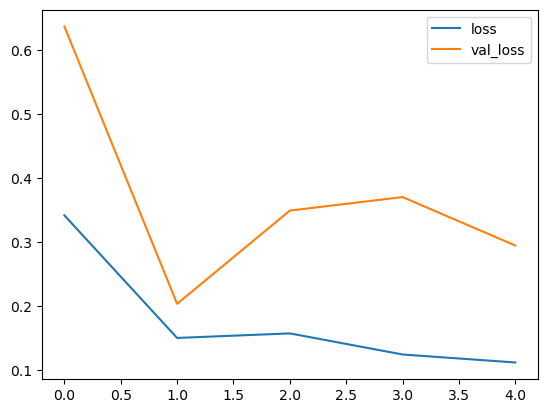

In [14]:
# Plot loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

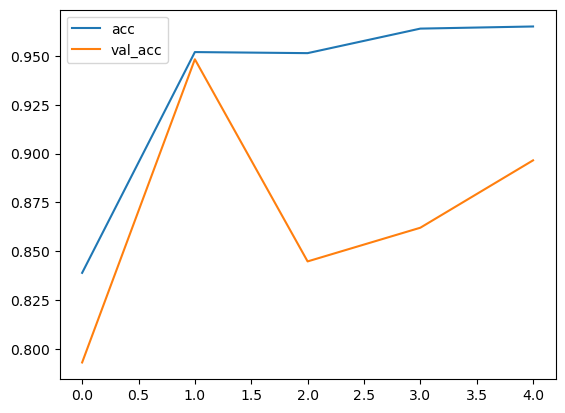

In [15]:
# how accurate it is?
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [16]:
# This helps in taking individual images from the dataset, load and check results
def predictImage(filename):
    img1 = image.load_img(filename, target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y, axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel('No fire', fontsize=30)
    elif val == 0:
        plt.xlabel('Fire', fontsize=30)
        

1/1 [==============================] - 0s 251ms/step
[[0.]]


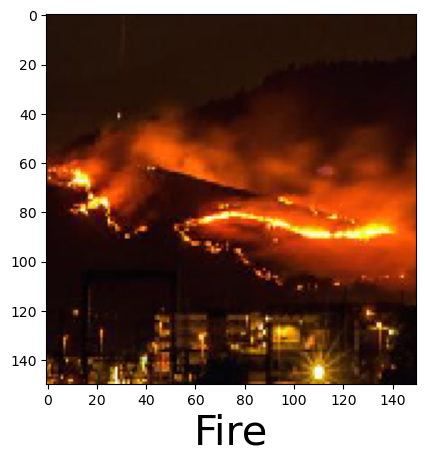

In [17]:
predictImage("C:/Users/Shailesh/Documents/NEw Folder/DL/Notebooks/Testing/fire/abc182.jpg")

1/1 [==============================] - 0s 59ms/step
[[1.]]


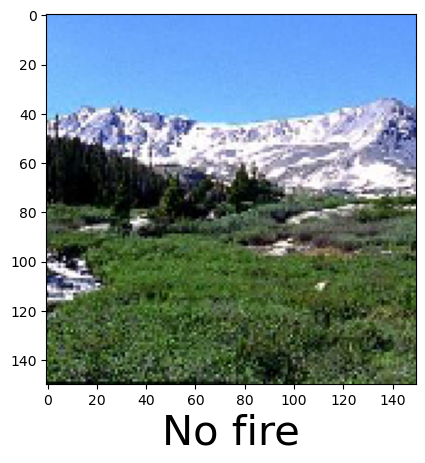

In [18]:
predictImage("C:/Users/Shailesh/Documents/NEw Folder/DL/Notebooks/Testing/nofire/abc337.jpg")